#  Project 2: Harris Corner Detection and Matching

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints, get_features

## Open Two images for matching. Convert them into grayscale
### Take two similar images and add the photos to folder data. Rename these images as img1.jpg, and img2.jpg

In [32]:
img1_orig = cv2.imread('../data/it1.jpeg')
img2_orig = cv2.imread('../data/it2.jpeg')


img1= np.float32(cv2.cvtColor(img1_orig,cv2.COLOR_BGR2GRAY))
img2= np.float32(cv2.cvtColor(img2_orig,cv2.COLOR_BGR2GRAY))



# Get Harris Corners, normalize the corner values between 0 and 255. 

In [33]:
corners1, Ix1, Iy1 = harris_corners(img1, window_size=3, alpha=0.04, threshold=1e-3, nms_size=5)
corners2, Ix2, Iy2 = harris_corners(img2, window_size=3, alpha=0.04, threshold=1e-3, nms_size=5)

corners1 = cv2.normalize(corners1, corners1, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
corners2 = cv2.normalize(corners2, corners2, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)




In [34]:
cv2.imwrite('../results/corner1.png',Ix1)
cv2.imwrite('../results/corner2.png',Iy1)

True

# Set the threshold for corners and generate key points from these corners

In [35]:
threshold = 30
diameter = 5
kp1 = get_keypoints(corners1, Ix1, Iy1, threshold, diameter)
kp2 = get_keypoints(corners2, Ix2, Iy2, threshold, diameter)

# Draw the key points. The line (radius) depicts the gradient

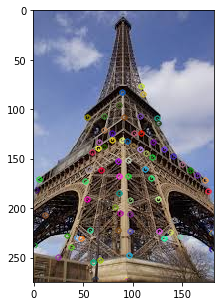

In [36]:
cv2.drawKeypoints(img1_orig, kp1, img1_orig, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                         
plotFigure(img1_orig,5)
plt.show()   

In [37]:
cv2.imwrite('../results/kpcar1.png',img1_orig)

True

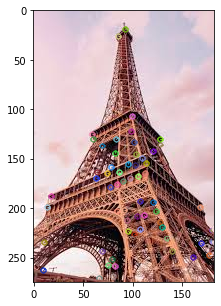

In [38]:
cv2.drawKeypoints(img2_orig, kp2, img2_orig,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plotFigure(img2_orig,5)
plt.show()   

In [39]:
cv2.imwrite('../results/kpcar2.png',img2_orig)

True

# From these key points, generate ORB descriptors. Then match these descriptors



In [40]:
orb = cv2.ORB_create()

# create sift instance
# sift = cv2.xfeatures2d.SIFT_create()
# get descriptors
descriptors1 = orb.compute(img1_orig, kp1)[1]
descriptors2 = orb.compute(img2_orig, kp2)[1]




In [41]:
print(descriptors1)

[[245 253 205 ... 243  66 160]
 [ 40  61  59 ... 146 102 169]
 [120  48 255 ... 168 118  59]
 ...
 [233 241 233 ... 176  86 248]
 [244 124 221 ... 112 199  10]
 [228  78  42 ...  43 126  67]]


In [42]:

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:10], img3, flags=2)



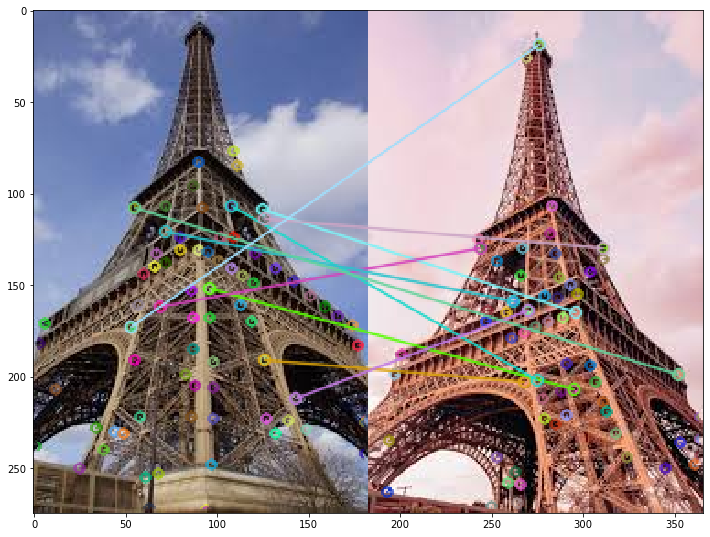

True

In [43]:
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/matchedcar.png', img3)


## Custom SIFT descriptor

In [44]:
import math

In [48]:
descriptors1 = get_features(img1, kp1, 32)
descriptors2 = get_features(img2, kp2, 32)

In [49]:
descriptors1 = np.float32(descriptors1)
descriptors2 = np.float32(descriptors2)

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:20], img3, flags=2)





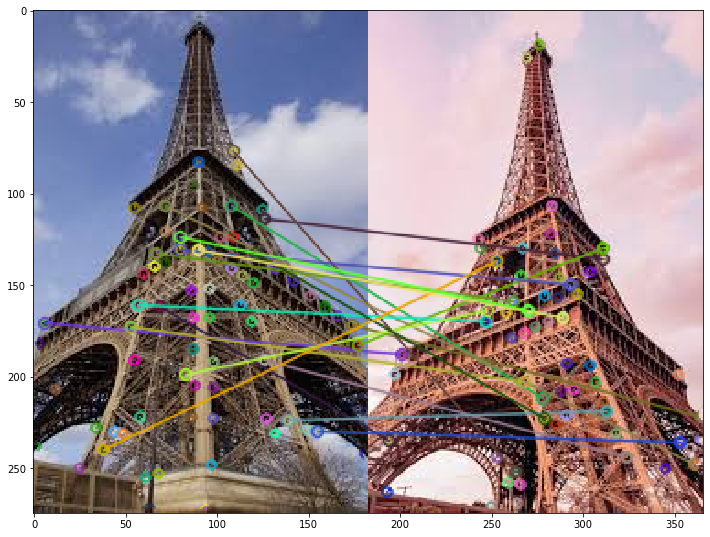

True

In [50]:
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/matchedcar_SIFT.png', img3)
